# Exploratory Data Analysis of BlueBikes Usage (2020–2025)
### Focus Area: Arsenal / Watertown High-Traffic Stations
**Course:** ISOM 839 / MSBA
**Student:** Rithanya Chandran

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Make plots look clean
sns.set_theme(style="whitegrid")
pd.set_option('display.max_columns', None)


## Loading the Dataset

The dataset used in this analysis is a reduced and partially cleaned subset of historical BlueBikes data (2020–2025).
Originally, the BlueBikes trip records across years exceed **20 million rows**, so a targeted sample of **~69,000 rows** was selected focusing on high traffic stations in Watertown, a high-demand suburban transit area.

This subset preserves meaningful ridership patterns while ensuring manageable computation and clearer exploratory insights.

In [4]:
df = pd.read_excel("Data_Files/Blue_Bikes Dataset.xlsx")

In [5]:
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,NaN,NaN,2020-10-08 14:35:34.844,2020-10-08 15:06:23.837,Bacon St at Washington St,469,Arsenal Yards,475,42.357119,-71.186045,42.36277388549605,-71.157649,Member
1,NaN,NaN,2020-10-08 17:12:13.810,2020-10-08 17:55:00.904,Harvard University Radcliffe Quadrangle at She...,104,Arsenal Yards,475,42.380287,-71.125107,42.36277388549605,-71.157649,Member
2,NaN,NaN,2020-10-08 17:23:05.398,2020-10-08 17:54:51.137,Harvard Kennedy School at Bennett St / Eliot St,70,Arsenal Yards,475,42.372217,-71.121881,42.36277388549605,-71.157649,Member
3,NaN,NaN,2020-10-09 10:40:55.509,2020-10-09 10:56:31.605,Soldiers Field Park - 111 Western Ave,17,Arsenal Yards,475,42.364263,-71.118276,42.36277388549605,-71.157649,Member
4,NaN,NaN,2020-10-09 13:52:43.999,2020-10-09 14:06:24.264,Western Ave at Richardson St,428,Arsenal Yards,475,42.361787,-71.143931,42.36277388549605,-71.157649,Member


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69545 entries, 0 to 69544
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   ride_id             44079 non-null  object        
 1   rideable_type       44079 non-null  object        
 2   started_at          69545 non-null  datetime64[ns]
 3   ended_at            69545 non-null  datetime64[ns]
 4   start_station_name  69544 non-null  object        
 5   start_station_id    69545 non-null  object        
 6   end_station_name    69498 non-null  object        
 7   end_station_id      69496 non-null  object        
 8   start_lat           69545 non-null  float64       
 9   start_lng           69545 non-null  float64       
 10  end_lat             69512 non-null  object        
 11  end_lng             69512 non-null  float64       
 12  member_casual       69545 non-null  object        
dtypes: datetime64[ns](2), float64(3), object(8)
me

In [7]:
df.describe()

,started_at,ended_at,start_lat,start_lng,end_lng
count,69545,69545,69545.000000,69545.000000,69512.000000
mean,2023-09-09 22:53:40.192389376,2023-09-09 23:27:04.139464960,42.363547,-71.149319,-71.053433
min,2020-10-08 14:35:34.844000,2020-10-08 15:06:23.837000,42.268100,-71.247759,-71.247759
25%,2022-08-07 00:02:55.424000,2022-08-07 00:13:14.953999872,42.362774,-71.157764,-71.157649
50%,2023-09-27 17:19:12,2023-09-27 17:49:19,42.362774,-71.157649,-71.157649
75%,2024-10-09 13:45:14.039000064,2024-10-09 14:06:28.807000064,42.364664,-71.141675,-71.141675
max,2025-08-31 22:58:38.752000,2025-08-31 23:17:02.484000,42.421361,-70.989609,42.364664
std,NaN,NaN,0.010191,0.025652,3.305766


In [8]:
df.nunique()

ride_id               40636
rideable_type             3
started_at            64034
ended_at              64041
start_station_name      441
start_station_id        697
end_station_name        437
end_station_id          705
start_lat              3732
start_lng              3954
end_lat                 690
end_lng                 689
member_casual             4
dtype: int64

In [9]:
df.isnull().sum()

ride_id               25466
rideable_type         25466
started_at                0
ended_at                  0
start_station_name        1
start_station_id          0
end_station_name         47
end_station_id           49
start_lat                 0
start_lng                 0
end_lat                  33
end_lng                  33
member_casual             0
dtype: int64

### Data Cleaning, Imputation, and Data Transformation

The dataset contained missing values primarily in the early years (2020–2021), when BlueBikes did not consistently store ride IDs or complete station metadata. To preserve valid ride records while maintaining consistency, the following cleaning steps were applied:

**Data Cleaning**
- Generated surrogate `ride_id` values (`"SURR_" + index`) for records missing a trip ID.
- Removed rows with missing `end_station_id`, because destination is required to analyze trip routes.

**Imputation**
- Filled missing `rideable_type` values using the mode (most frequent category).

**Data Transformation**
- Restored missing `start_station_name` values by mapping `start_station_id → start_station_name`.
- Standardized the `member_casual` labels to lowercase (`"member"`, `"casual"`).

These steps ensure the dataset is consistent, complete, and ready for accurate exploratory and statistical analysis.

In [10]:
# surrogate unique identifier was generated
df.loc[df['ride_id'].isna(), 'ride_id'] = "SURR_" + df.index[df['ride_id'].isna()].astype(str)
# imputation using the most common (mode)
df['rideable_type'] = df['rideable_type'].fillna(df['rideable_type'].mode()[0])
df = df[df['end_station_id'].notna()]
# Create lookup dict from id → name (only where name exists)
id_to_name = (df[['start_station_id', 'start_station_name']]
              .dropna()
              .drop_duplicates()
              .set_index('start_station_id')['start_station_name']
              .to_dict())
missing_mask = df['start_station_name'].isna() & df['start_station_id'].notna()

df.loc[missing_mask, 'start_station_name'] = df.loc[missing_mask, 'start_station_id'].map(id_to_name)
#cleaning case sensitivity(casual,member)
df['member_casual'] = df['member_casual'].str.lower().str.strip()

In [11]:
df.isnull().sum()

ride_id               0
rideable_type         0
started_at            0
ended_at              0
start_station_name    0
start_station_id      0
end_station_name      0
end_station_id        0
start_lat             0
start_lng             0
end_lat               0
end_lng               0
member_casual         0
dtype: int64

## Feature Engineering

To enable deeper behavioral analysis, additional variables were created from the raw timestamps.

**Ride Duration** (in minutes) was calculated by taking the difference between the ride start and end timestamps in minutes.
To ensure realistic trip behavior, extreme outliers were filtered out by keeping only trips with durations between **1 and 120 minutes**, consistent with typical bike-sharing usage patterns.

This engineered feature allows comparison of riding habits between **casual riders** and **members**, and supports later visualization and hypothesis testing.

In [12]:
df['ride_duration'] = (df['ended_at'] - df['started_at']).dt.total_seconds() / 60

In [13]:
df['ride_duration'].describe()

count    69496.000000
mean        32.892994
std        352.739802
min          0.000000
25%         11.833333
50%         20.233333
75%         31.700000
max      37236.666667
Name: ride_duration, dtype: float64

In [14]:
df = df[df['ride_duration'].between(1, 120)]

In [15]:
df['ride_duration'].describe()

count    68618.000000
mean        24.398178
std         18.122907
min          1.000000
25%         11.780933
50%         20.048517
75%         31.232733
max        119.914317
Name: ride_duration, dtype: float64

### Data Transformation

New time-based variables were extracted from the `started_at` timestamp to support temporal analysis:

- **hour** → hour of day (0–23)
- **weekday** → day name (Mon–Sun)
- **month** → month name (Jan–Dec)

These fields help identify peak usage times and seasonal/weekly patterns.

In [16]:
df['hour'] = df['started_at'].dt.hour
df['weekday'] = df['started_at'].dt.day_name()
df['month'] = df['started_at'].dt.month_name()

In [17]:
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_duration,hour,weekday,month
0,SURR_0,classic_bike,2020-10-08 14:35:34.844,2020-10-08 15:06:23.837,Bacon St at Washington St,469,Arsenal Yards,475,42.357119,-71.186045,42.36277388549605,-71.157649,member,30.816550,14,Thursday,October
1,SURR_1,classic_bike,2020-10-08 17:12:13.810,2020-10-08 17:55:00.904,Harvard University Radcliffe Quadrangle at She...,104,Arsenal Yards,475,42.380287,-71.125107,42.36277388549605,-71.157649,member,42.784900,17,Thursday,October
2,SURR_2,classic_bike,2020-10-08 17:23:05.398,2020-10-08 17:54:51.137,Harvard Kennedy School at Bennett St / Eliot St,70,Arsenal Yards,475,42.372217,-71.121881,42.36277388549605,-71.157649,member,31.762317,17,Thursday,October
3,SURR_3,classic_bike,2020-10-09 10:40:55.509,2020-10-09 10:56:31.605,Soldiers Field Park - 111 Western Ave,17,Arsenal Yards,475,42.364263,-71.118276,42.36277388549605,-71.157649,member,15.601600,10,Friday,October
4,SURR_4,classic_bike,2020-10-09 13:52:43.999,2020-10-09 14:06:24.264,Western Ave at Richardson St,428,Arsenal Yards,475,42.361787,-71.143931,42.36277388549605,-71.157649,member,13.671083,13,Friday,October


### Data Transformation

To support time-based analysis, additional transformations were applied:

- Converted `weekday` into an **ordered categorical feature** (`Monday → Sunday`) so plots and summaries appear in a meaningful weekly order instead of alphabetical.
- Confirmed the earlier extracted `hour` and `month` fields from timestamps are correctly typed for grouping and visualization.

This ensures that temporal trends (such as commute peaks or weekend patterns) are represented accurately in the visualizations.

In [18]:
df['weekday'] = pd.Categorical(df['weekday'],
                               categories=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'],
                               ordered=True)

### Univariate Analysis: Ride Duration Distribution

The histogram shows that most BlueBikes trips are relatively short:

- The **majority of rides last between 10 and 30 minutes**, which aligns with typical commuting or short-distance travel behavior.
- Very long rides (over 60 minutes) are **rare**, appearing as a long right tail in the distribution.
- This **right-skewed** pattern is expected for shared bike systems, where bikes are used mainly for quick point-to-point transportation rather than long recreational trips.

This distribution validates that the ride duration feature behaves realistically and supports further comparative analysis (e.g., member vs. casual behavior).

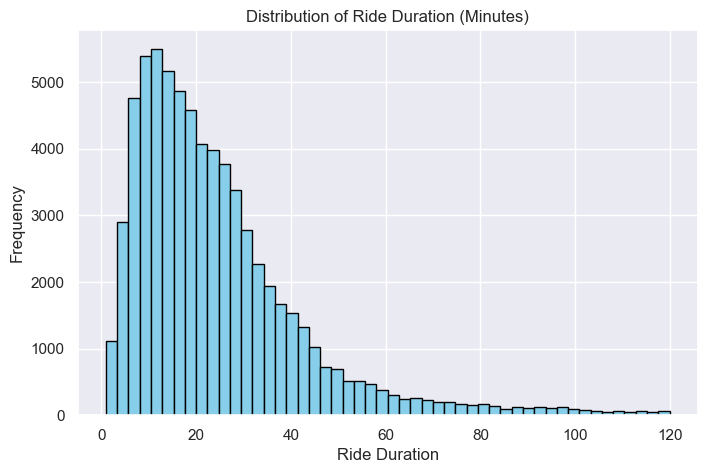

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.hist(df['ride_duration'], bins=50, color='skyblue', edgecolor='black')
plt.title("Distribution of Ride Duration (Minutes)")
plt.xlabel("Ride Duration")
plt.ylabel("Frequency")
plt.show()


### Ride Volume by Hour of Day

This visualization highlights when BlueBikes are used most during the day:

- **Peak usage occurs between 4 PM and 6 PM**, indicating strong **evening commute demand**.
- A smaller rise is seen around **8–10 AM**, aligning with **morning commute activity**.
- Usage remains **very low between midnight and 6 AM**, reflecting limited late-night travel.

**Insight:** BlueBikes usage patterns strongly mirror typical workday commuting behavior — riders most often use bikes during travel to and from workplaces, transit hubs, and schools.

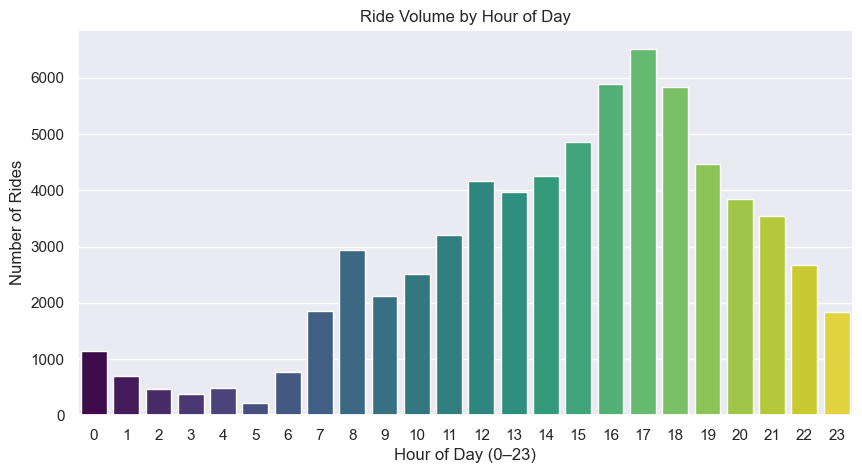

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
sns.countplot(x='hour', data=df, hue='hour', palette='viridis', legend=False)
plt.title("Ride Volume by Hour of Day")
plt.xlabel("Hour of Day (0–23)")
plt.ylabel("Number of Rides")
plt.show()

### Distribution of Rider Types (Member vs Casual)

This chart shows the overall composition of rider types in the dataset.

- **Members account for a larger share of trips** compared to casual riders.
- This suggests that **subscription usage is strong** in the Watertown/Arsenal region, likely due to commuters and residents who ride frequently.
- **Casual riders** still form a significant user segment, representing **occasional or recreational** usage (e.g., weekends, leisure rides).

**Insight:** The presence of both strong member and casual ridership indicates that the station area supports **both daily mobility and leisure-based cycling** patterns.

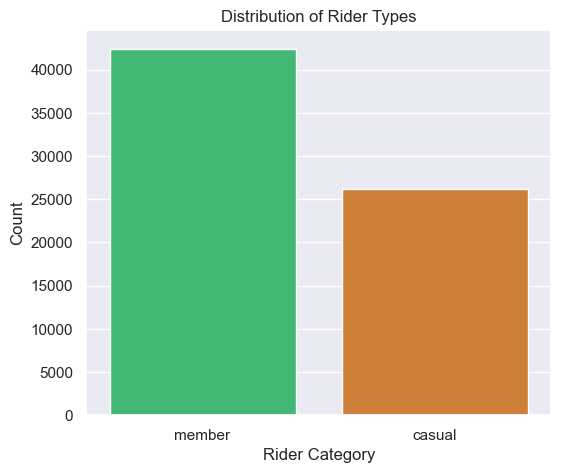

In [21]:
#Univariate - Categorical Distribution of member vs casual
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,5))
sns.countplot(
    data=df,
    x='member_casual',
    hue='member_casual',
    palette={'member': '#2ECC71', 'casual': '#E67E22'},
    legend=False
)
plt.title("Distribution of Rider Types")
plt.xlabel("Rider Category")
plt.ylabel("Count")
plt.show()

### Distribution of Bike Types

The dataset includes three bike categories:

- **classic_bike** – Standard pedal bike commonly used for most trips.
- **electric_bike** – Pedal-assist bike used for longer or faster rides.
- **docked_bike** – Older key-fob based bike model that has been gradually phased out.

**Insight:** Classic bikes have the highest usage, followed by electric bikes. Docked bikes appear least often because this older model is no longer widely deployed in the system.
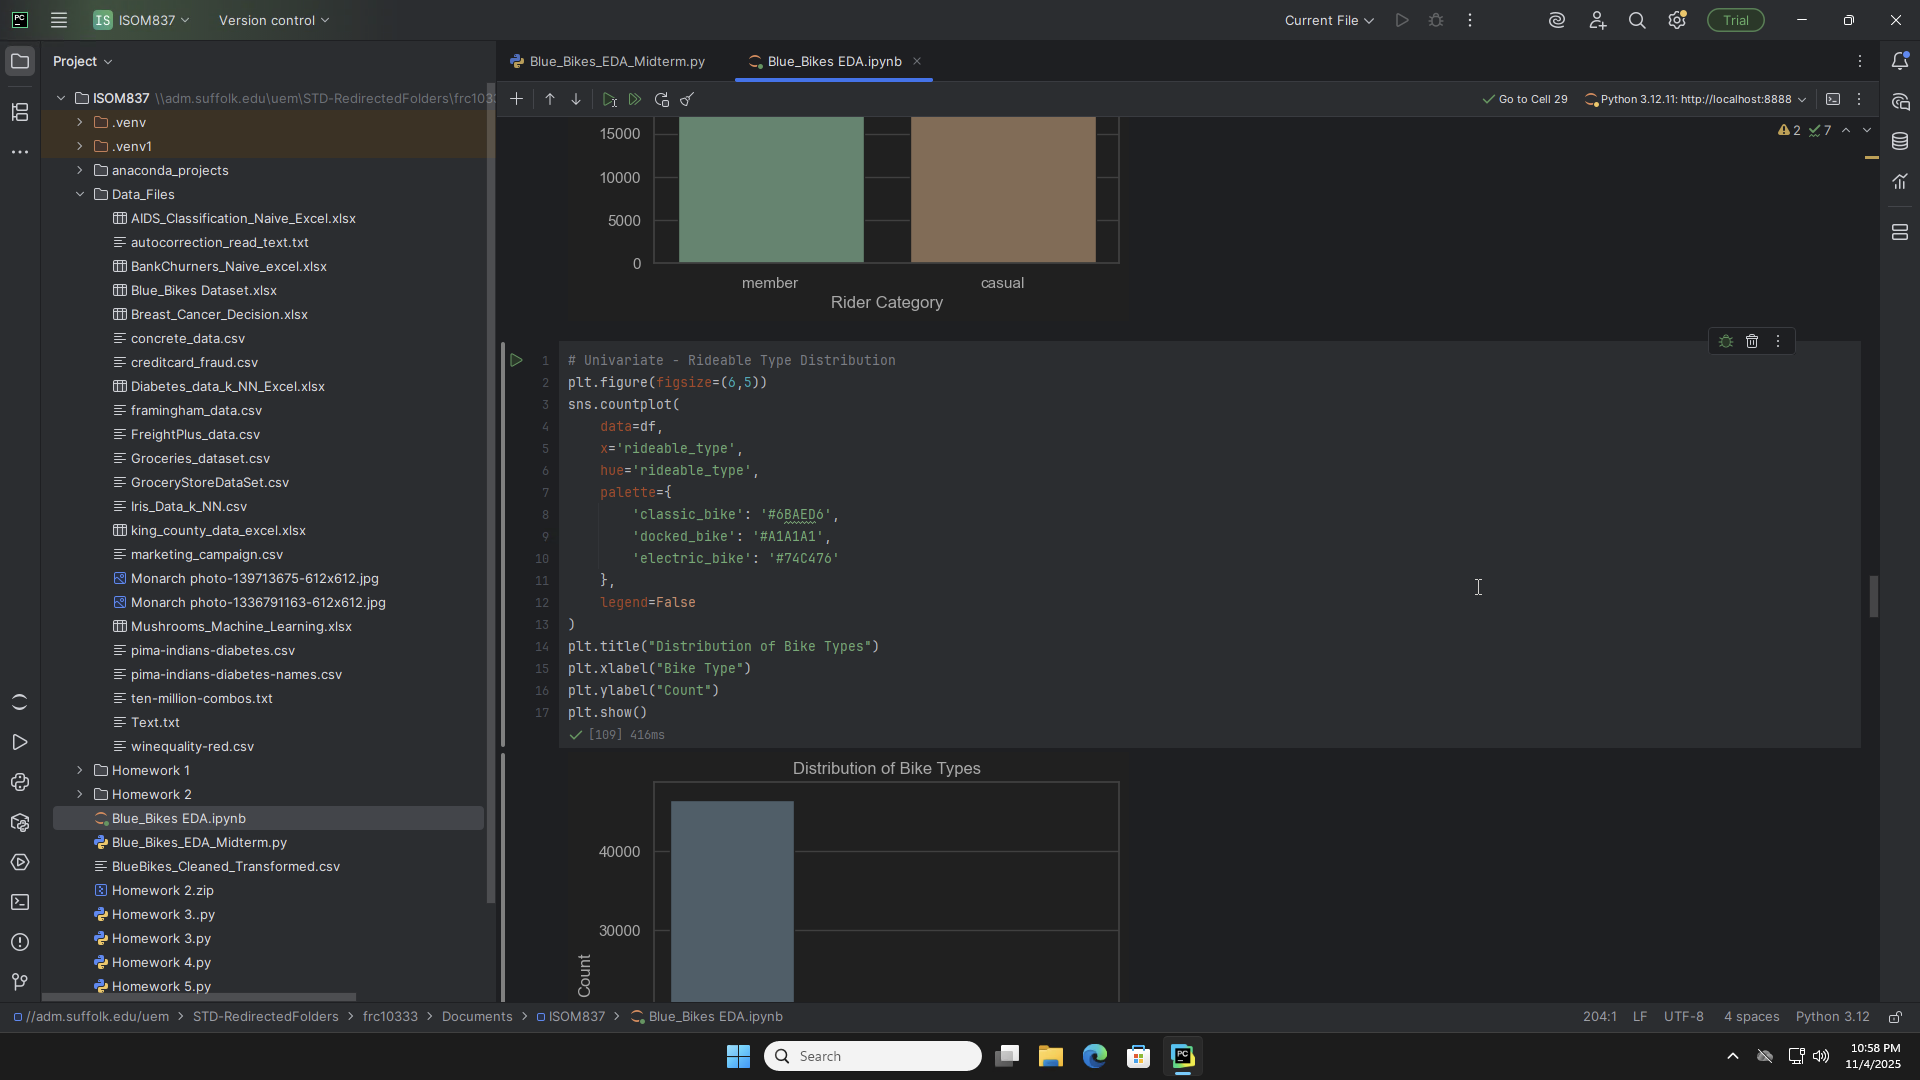

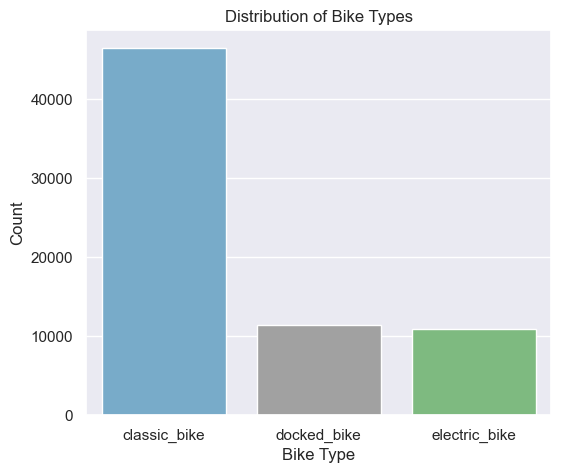

In [22]:
# Univariate - Rideable Type Distribution
plt.figure(figsize=(6,5))
sns.countplot(
    data=df,
    x='rideable_type',
    hue='rideable_type',
    palette={
        'classic_bike': '#6BAED6',
        'docked_bike': '#A1A1A1',
        'electric_bike': '#74C476'
    },
    legend=False
)
plt.title("Distribution of Bike Types")
plt.xlabel("Bike Type")
plt.ylabel("Count")
plt.show()

### Bivariate Analysis: Rider Type vs Ride Duration

This boxplot represents the **relationship between rider type (member vs casual)** and **ride duration**, making it a bivariate comparison.

- **Casual riders** consistently show **longer and more variable trip durations**, which aligns with leisure or recreational usage.
- **Members** have **shorter, more uniform ride times**, suggesting routine usage such as commuting.
- The **larger spread and higher median** for casual riders clearly demonstrates differing behavioral patterns between the two groups.

**Conclusion:** Rider type **significantly influences** ride duration, indicating different **usage motivations and travel behavior**.

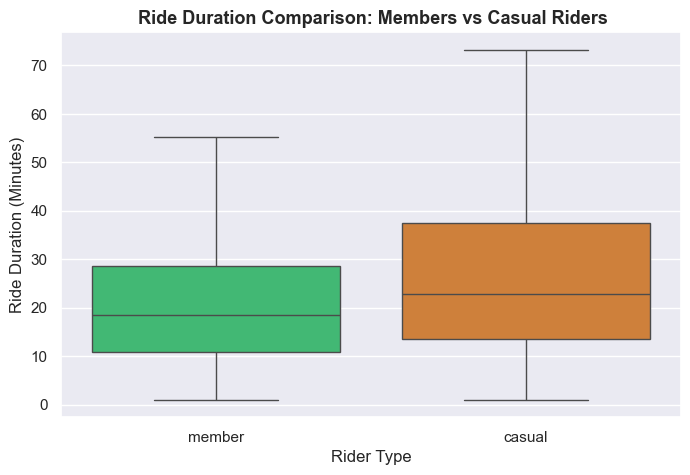

In [23]:
custom_palette = {"member": "#2ECC71", "casual": "#E67E22"}

plt.figure(figsize=(8,5))
sns.boxplot( x='member_casual', y='ride_duration', data=df, hue='member_casual',  palette=custom_palette, dodge=False,  showfliers=False)
plt.legend([],[], frameon=False) # removes duplicate legend
plt.title(" Ride Duration Comparison: Members vs Casual Riders", fontsize=13, weight='bold')
plt.xlabel("Rider Type")
plt.ylabel("Ride Duration (Minutes)")
plt.show()

### Bivariate Analysis: Ride Volume by Hour of Day (Members vs Casual)

This visualization compares hourly riding patterns between **members** and **casual riders**:

- **Members show strong peaks around 8–9 AM and 5–6 PM**, which corresponds to **commuting hours**.
  → This indicates members primarily use BlueBikes for **work or school travel**.

- **Casual riders show higher activity during late morning and afternoon (11 AM–5 PM)**, peaking around **3–5 PM**.
  → This reflects **recreational and leisure-oriented usage**.

- During late-night hours (10 PM onward), both groups decline, indicating limited night usage.

**Insight:**
Ride timing behaviors are **fundamentally different** between the two rider groups — supporting that **members are commuters**, while **casual riders tend to be leisure/time-flexible users.**

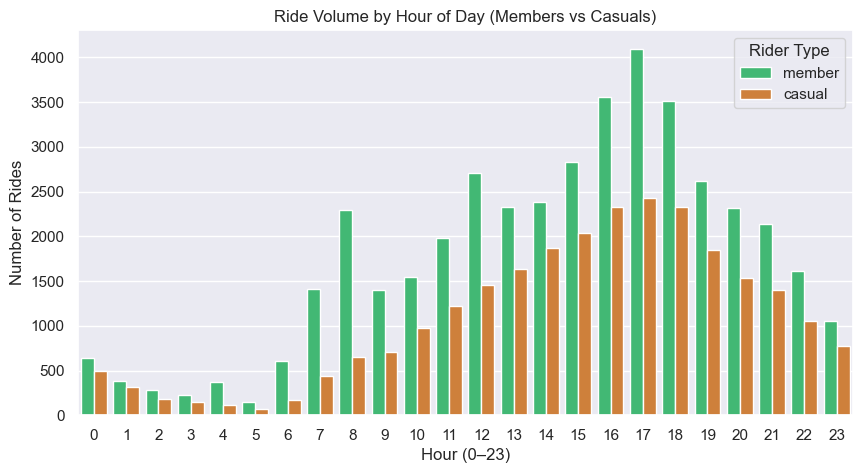

In [24]:
plt.figure(figsize=(10,5))
sns.countplot(x='hour', hue='member_casual', data=df, palette=['#2ECC71','#E67E22'])
plt.title("Ride Volume by Hour of Day (Members vs Casuals)")
plt.xlabel("Hour (0–23)")
plt.ylabel("Number of Rides")
plt.legend(title="Rider Type")
plt.show()

### Top Starting and Ending Stations

The tables above show the stations with the highest number of trips beginning and ending there.

**What we see:**
- **Arsenal Yards** is the most frequently used station, both as a **starting** and **ending** point.
- Other nearby stations like **160 Arsenal**, **Arsenal on the Charles**, and **Watertown Square** also appear at the top.
- This indicates that the **Arsenal / Watertown area is a major riding hub** with very high demand.

**Interpretation:**
- Many trips in this region are **short-distance and local**, suggesting riders use bikes for quick errands, leisure loops, or short commutes.
- The strong overlap between starting and ending stations suggests **round-trip behavior is common**, especially among **casual riders**.
- This supports the idea that **increasing bike availability and docking capacity** in Arsenal / Watertown could improve rider experience and reduce dock shortages.

In [25]:
top_start = df['start_station_name'].value_counts().head(15)
top_end = df['end_station_name'].value_counts().head(15)

print("Top Starting Stations:\n", top_start)
print("\nTop Ending Stations:\n", top_end)

Top Starting Stations:
 start_station_name
Arsenal Yards                                  27177
160 Arsenal                                     9403
Arsenal on the Charles                          2501
Watertown Sq                                     890
699 Mt Auburn St                                 879
Coolidge Sq.                                     858
New Balance - 20 Guest St                        818
Boston Landing                                   765
Western Ave at Richardson St                     735
Nichols Ave. at Watertown Greenway               725
Brighton Mills - 370 Western Ave                 709
Washington St at Brock St                        667
Oak Square - 615 Washington St                   659
Union Square - Brighton Ave at Cambridge St      653
Fresh Pond Reservation                           582
Name: count, dtype: int64

Top Ending Stations:
 end_station_name
Arsenal Yards                                                       28330
160 Arsenal           

### Station-Level Usage (Top Start & End Stations)

The results show a **strong concentration of trips in the Arsenal / Watertown area**.
**Arsenal Yards** is the most frequent station for both **starting** and **ending** trips, followed by **160 Arsenal** and **Arsenal on the Charles**.

This indicates that the **Arsenal neighborhood functions as a high-demand hub** for BlueBikes usage, suggesting the need for **increased bike capacity and more frequent rebalancing** at these stations.

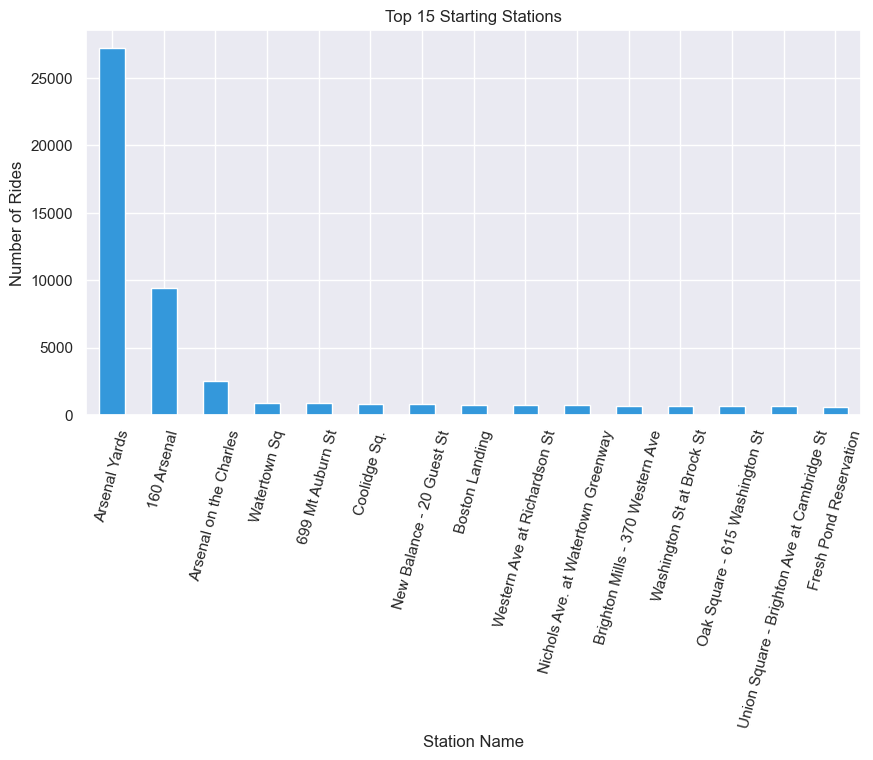

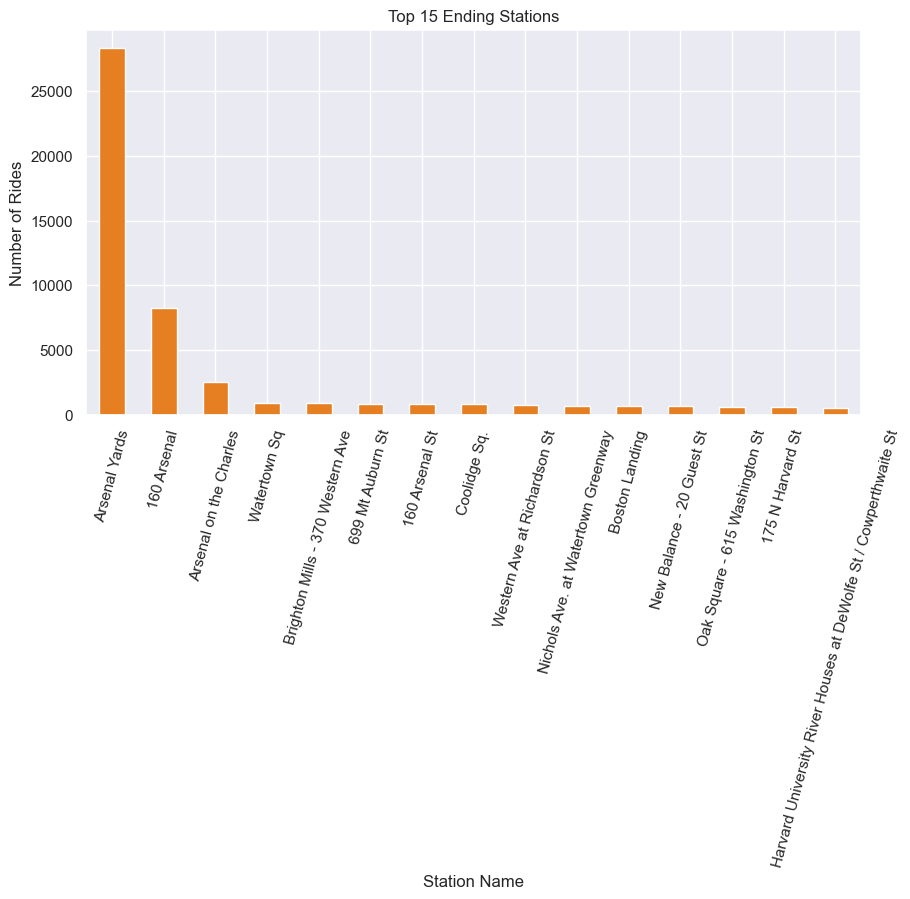

In [26]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
top_start.plot(kind='bar', color='#3498db')
plt.title("Top 15 Starting Stations")
plt.ylabel("Number of Rides")
plt.xlabel("Station Name")
plt.xticks(rotation=75)
plt.show()

plt.figure(figsize=(10,5))
top_end.plot(kind='bar', color='#E67E22')
plt.title("Top 15 Ending Stations")
plt.ylabel("Number of Rides")
plt.xlabel("Station Name")
plt.xticks(rotation=75)
plt.show()

### Focus on Watertown / Arsenal Stations

To better understand station-level demand within the Watertown–Arsenal region, I filtered the dataset to only include stations whose names contain **“Watertown”** or **“Arsenal.”**

The results clearly show that **Arsenal Yards** and **160 Arsenal** are the **most heavily used stations**, far exceeding all other nearby locations. This confirms that the Arsenal district functions as a **major BlueBikes activity hub**, supporting strong daily commuting and leisure trip patterns.

This insight suggests that the Arsenal area **may benefit from additional docks and more frequent bike rebalancing** to keep up with demand.

In [27]:
watertown = df[df['start_station_name'].str.contains("Watertown|Arsenal", case=False, na=False)]
watertown['start_station_name'].value_counts().head(10)

start_station_name
Arsenal Yards                         27177
160 Arsenal                            9403
Arsenal on the Charles                 2501
Watertown Sq                            890
Nichols Ave. at Watertown Greenway      725
Watertown Town Hall                     312
Watertown City Hall                     205
Watertown St at 5th Ave                  88
Galen St at Watertown St                 53
Watertown St at Albemarle Rd             50
Name: count, dtype: int64

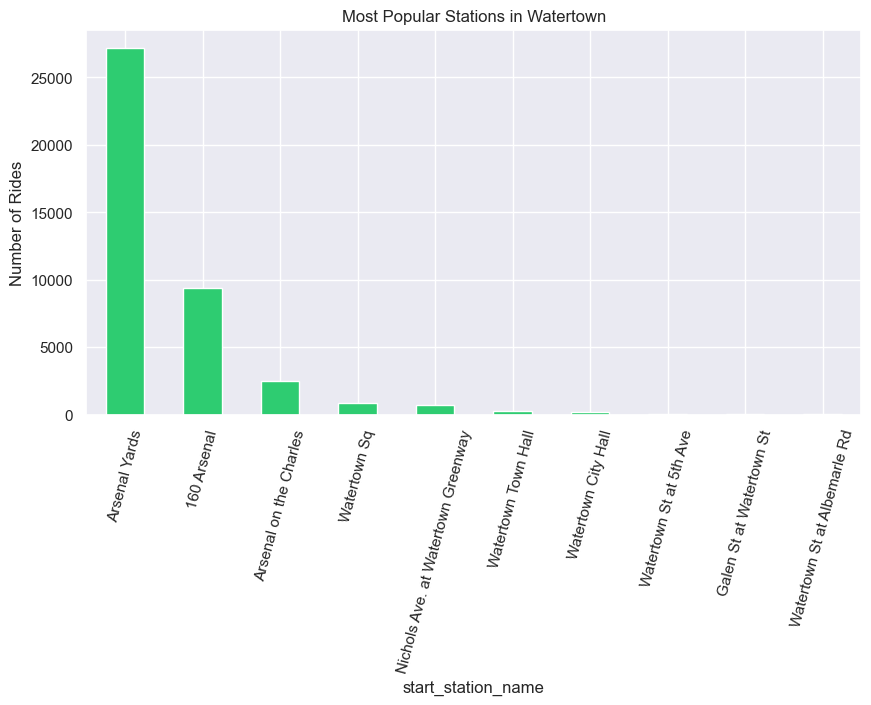

In [28]:
watertown['start_station_name'].value_counts().head(10).plot(
    kind='bar',
    figsize=(10,5),
    color='#2ECC71'
)
plt.title("Most Popular Stations in Watertown")
plt.ylabel("Number of Rides")
plt.xticks(rotation=75)
plt.show()


# Final Assessment Extension: Data Mining Analysis

## Data Mining Method 1: K-Means Clustering


Cluster Behavior Summary (Mean Values):
         ride_duration   hour  is_weekend  is_member
cluster                                             
0.0              68.31  14.78        0.51       0.17
1.0              20.54  15.02        0.33       0.00
2.0              20.10  14.49        0.27       1.00

Cluster Sizes:
cluster
2.0    41428
1.0    21269
0.0     5921
Name: count, dtype: int64

Cluster Share by Arsenal Start Station:
start_station_name  Arsenal Yards  160 Arsenal  Arsenal on the Charles
cluster                                                               
0.0                          0.10         0.12                    0.09
1.0                          0.31         0.34                    0.25
2.0                          0.59         0.54                    0.66


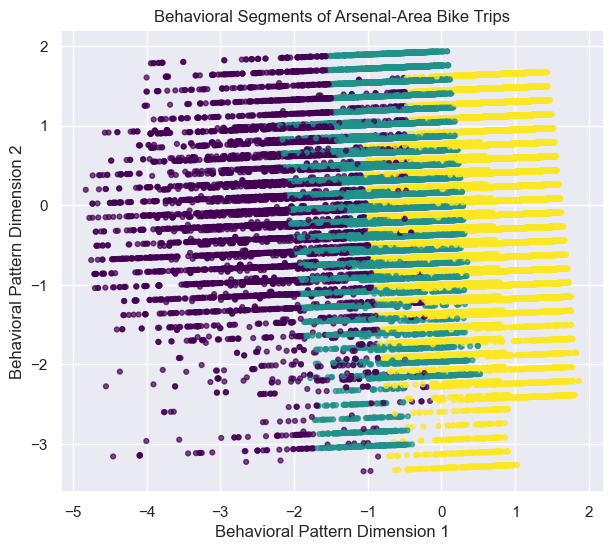

In [29]:
# ============================================================
# DATA MINING METHOD 1: UNSUPERVISED TRIP SEGMENTATION (K-MEANS)
# Reuses features created during EDA
# ============================================================

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd

# ------------------------------------------------------------
# 1. Focus ONLY on Arsenal-area trips
#   (any trip starting OR ending at the 3 Arsenal stations)
# ------------------------------------------------------------
arsenal_stations = [
    'Arsenal Yards',
    '160 Arsenal',
    'Arsenal on the Charles'
]

df_arsenal = df[
    (df['start_station_name'].isin(arsenal_stations)) |
    (df['end_station_name'].isin(arsenal_stations))
].copy()

# ------------------------------------------------------------
# 2. Reuse EDA-derived behavioral features
# ------------------------------------------------------------
df_arsenal['hour'] = df_arsenal['started_at'].dt.hour
df_arsenal['is_weekend'] = df_arsenal['started_at'].dt.weekday.isin([5, 6]).astype(int)
df_arsenal['is_member'] = (df_arsenal['member_casual'] == 'member').astype(int)

cluster_df = df_arsenal[
    ['ride_duration', 'hour', 'is_weekend', 'is_member']
].dropna()

# ------------------------------------------------------------
# 3. Scale features
# ------------------------------------------------------------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(cluster_df)

# ------------------------------------------------------------
# 4. Fit K-Means (k = 3)
# ------------------------------------------------------------
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

df_arsenal.loc[cluster_df.index, 'cluster'] = clusters

# ------------------------------------------------------------
# 5. CLUSTER BEHAVIOR SUMMARY (PRIMARY RESULT)
# ------------------------------------------------------------
cluster_summary = (
    df_arsenal
    .groupby('cluster')[['ride_duration', 'hour', 'is_weekend', 'is_member']]
    .mean()
    .round(2)
)

print("Cluster Behavior Summary (Mean Values):")
print(cluster_summary)

print("\nCluster Sizes:")
print(df_arsenal['cluster'].value_counts())

# ------------------------------------------------------------
# 6. CLUSTER DISTRIBUTION ACROSS ARSENAL STATIONS
# ------------------------------------------------------------
station_cluster_share = (
    pd.crosstab(
        df_arsenal['cluster'],
        df_arsenal['start_station_name']
    )[arsenal_stations]
    .div(
        pd.crosstab(
            df_arsenal['cluster'],
            df_arsenal['start_station_name']
        )[arsenal_stations].sum()
    )
    .round(2)
)

print("\nCluster Share by Arsenal Start Station:")
print(station_cluster_share)

# ------------------------------------------------------------
# 7. VISUALIZATION OF BEHAVIORAL SEGMENTS (PCA – FOR DISPLAY ONLY)
# ------------------------------------------------------------
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(7,6))
plt.scatter(
    X_pca[:, 0],
    X_pca[:, 1],
    c=clusters,
    cmap='viridis',
    s=12,
    alpha=0.7
)

plt.xlabel('Behavioral Pattern Dimension 1')
plt.ylabel('Behavioral Pattern Dimension 2')
plt.title('Behavioral Segments of Arsenal-Area Bike Trips')

plt.show()

Internal Flow Matrix (Trips Between Arsenal Stations):
end_station_name        160 Arsenal  Arsenal Yards  Arsenal on the Charles
start_station_name                                                        
160 Arsenal                    1871           2060                     200
Arsenal Yards                  1344           3162                     290
Arsenal on the Charles           64            416                     210

Net Flow by Arsenal Station:
                        Trips_Started  Trips_Ended  Net_Flow (End - Start)
Arsenal Yards                    4796         5638                     842
160 Arsenal                      4131         3279                    -852
Arsenal on the Charles            690          700                      10


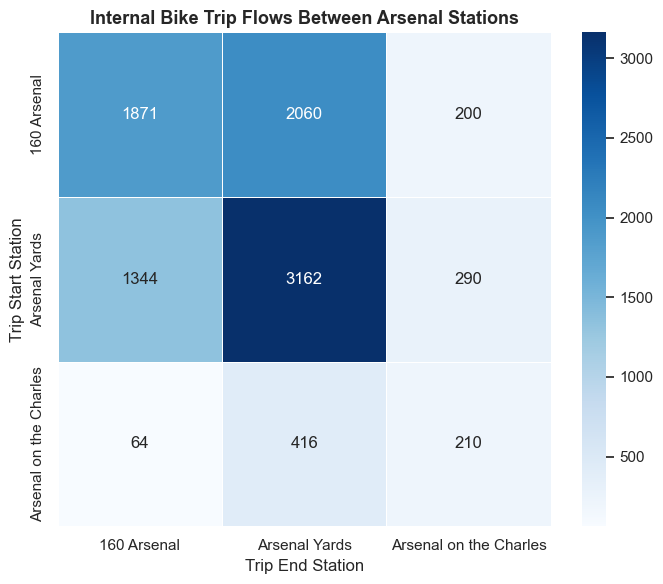

In [30]:
# ============================================================
# DATA MINING METHOD 2: MICRO-NETWORK FLOW ANALYSIS
# Arsenal Stations Only
# ============================================================

import pandas as pd

# ------------------------------------------------------------
# 1. Focus strictly on the three Arsenal stations
# ------------------------------------------------------------
arsenal_stations = [
    'Arsenal Yards',
    '160 Arsenal',
    'Arsenal on the Charles'
]

df_micro = df[
    df['start_station_name'].isin(arsenal_stations) &
    df['end_station_name'].isin(arsenal_stations)
].copy()

# ------------------------------------------------------------
# 2. Internal Arsenal-to-Arsenal flows
# ------------------------------------------------------------
arsenal_flows = (
    df_micro
    .groupby(['start_station_name', 'end_station_name'])
    .size()
    .reset_index(name='trip_count')
)

# ------------------------------------------------------------
# 3. Pivot for readability (THIS IS THE RESULT)
# ------------------------------------------------------------
flow_matrix = arsenal_flows.pivot(
    index='start_station_name',
    columns='end_station_name',
    values='trip_count'
).fillna(0).astype(int)

print("Internal Flow Matrix (Trips Between Arsenal Stations):")
print(flow_matrix)

# ------------------------------------------------------------
# 4. Net flow per station (source vs sink)
# ------------------------------------------------------------
net_flow = pd.DataFrame({
    'Trips_Started': df_micro['start_station_name'].value_counts(),
    'Trips_Ended': df_micro['end_station_name'].value_counts()
}).fillna(0).astype(int)

net_flow['Net_Flow (End - Start)'] = (
    net_flow['Trips_Ended'] - net_flow['Trips_Started']
)

print("\nNet Flow by Arsenal Station:")
print(net_flow)

# ------------------------------------------------------------
# 5. VISUAL REPRESENTATION: INTERNAL FLOW HEATMAP
# ------------------------------------------------------------

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(7, 6))

sns.heatmap(
    flow_matrix,
    annot=True,
    fmt="d",
    cmap="Blues",
    linewidths=0.5
)

plt.title("Internal Bike Trip Flows Between Arsenal Stations", fontsize=13, weight="bold")
plt.xlabel("Trip End Station")
plt.ylabel("Trip Start Station")

plt.tight_layout()
plt.show()

Top Co-Occurring Trip Patterns:
         station rider_type      bike_type day_type  count
0  Arsenal Yards     member   classic_bike  Weekday   7554
1  Arsenal Yards     casual   classic_bike  Weekday   4682
2  Arsenal Yards     member   classic_bike  Weekend   3253
3    160 Arsenal     member   classic_bike  Weekday   2980
4  Arsenal Yards     casual   classic_bike  Weekend   2790
5  Arsenal Yards     member    docked_bike  Weekday   2093
6  Arsenal Yards     member  electric_bike  Weekday   2015
7    160 Arsenal     casual   classic_bike  Weekday   1859
8  Arsenal Yards     casual    docked_bike  Weekday   1190
9    160 Arsenal     member   classic_bike  Weekend   1169


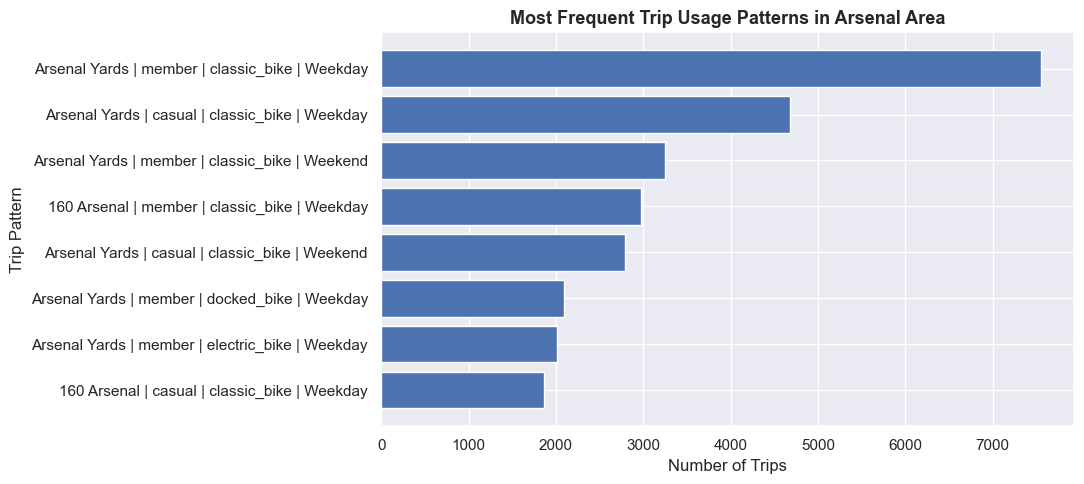

In [31]:
# ============================================================
# DATA MINING METHOD 2: ASSOCIATION PATTERN MINING
# (Syllabus-safe, no external libraries)
# ============================================================

import pandas as pd

# ------------------------------------------------------------
# 1. Focus only on Arsenal trips
# ------------------------------------------------------------
arsenal_stations = [
    'Arsenal Yards',
    '160 Arsenal',
    'Arsenal on the Charles'
]

df_ar = df[
    (df['start_station_name'].isin(arsenal_stations)) |
    (df['end_station_name'].isin(arsenal_stations))
].copy()

# ------------------------------------------------------------
# 2. Create categorical features
# ------------------------------------------------------------
df_ar['station'] = df_ar['start_station_name'].fillna(df_ar['end_station_name'])
df_ar['rider_type'] = df_ar['member_casual']
df_ar['bike_type'] = df_ar['rideable_type']
df_ar['day_type'] = df_ar['started_at'].dt.weekday.apply(
    lambda x: 'Weekend' if x >= 5 else 'Weekday'
)

df_cat = df_ar[['station', 'rider_type', 'bike_type', 'day_type']].dropna()

# ------------------------------------------------------------
# 3. Count frequent combinations
# ------------------------------------------------------------
pattern_counts = (
    df_cat
    .value_counts()
    .reset_index(name='count')
    .sort_values(by='count', ascending=False)
)

print("Top Co-Occurring Trip Patterns:")
print(pattern_counts.head(10))
import matplotlib.pyplot as plt

# Take top frequent patterns only
top_patterns = pattern_counts.head(8).copy()

# Create readable labels
top_patterns['label'] = top_patterns.apply(
    lambda x: f"{x['station']} | {x['rider_type']} | {x['bike_type']} | {x['day_type']}",
    axis=1
)

# Plot
plt.figure(figsize=(11,5))
plt.barh(top_patterns['label'], top_patterns['count'], color='#4C72B0')
plt.gca().invert_yaxis()

plt.title("Most Frequent Trip Usage Patterns in Arsenal Area", fontsize=13, weight='bold')
plt.xlabel("Number of Trips")
plt.ylabel("Trip Pattern")

plt.tight_layout()
plt.show()

In [32]:
# 1. Extract hour
df['hour'] = df['started_at'].dt.hour

# 2. Count departures
dep = (
    df.groupby(['start_station_name', 'hour'])
      .size()
      .reset_index(name='departures')
)

# 3. Count arrivals
arr = (
    df.groupby(['end_station_name', 'hour'])
      .size()
      .reset_index(name='arrivals')
)

# 4. Merge
flow = dep.merge(
    arr,
    left_on=['start_station_name', 'hour'],
    right_on=['end_station_name', 'hour'],
    how='outer'
).fillna(0)

# 5. Clean
flow['station'] = flow['start_station_name'].combine_first(flow['end_station_name'])
flow = flow[['station', 'hour', 'departures', 'arrivals']]

# 6. Net flow
flow['net_flow'] = flow['arrivals'] - flow['departures']

flow.head()

,station,hour,departures,arrivals,net_flow
0,0,6,0.0,1.0,1.0
1,101 Smith Place,7,3.0,2.0,-1.0
2,101 Smith Place,8,10.0,3.0,-7.0
3,101 Smith Place,9,1.0,1.0,0.0
4,101 Smith Place,10,1.0,0.0,-1.0


In [33]:
flow = flow[flow['station'] != 0]
flow = flow[flow['station'].notna()]

In [34]:
flow.head()

,station,hour,departures,arrivals,net_flow
1,101 Smith Place,7,3.0,2.0,-1.0
2,101 Smith Place,8,10.0,3.0,-7.0
3,101 Smith Place,9,1.0,1.0,0.0
4,101 Smith Place,10,1.0,0.0,-1.0
7,101 Smith Place,16,2.0,0.0,-2.0


In [35]:
pressure = (
    flow.groupby('station')
        .agg(
            peak_deficit=('net_flow', lambda x: abs(x[x < 0].min()) if (x < 0).any() else 0),
            deficit_hours=('net_flow', lambda x: (x < 0).sum()),
            total_hours=('net_flow', 'count')
        )
        .reset_index()
)

pressure['deficit_ratio'] = pressure['deficit_hours'] / pressure['total_hours']
pressure.head()

,station,peak_deficit,deficit_hours,total_hours,deficit_ratio
0,101 Smith Place,7.0,5,6,0.833333
1,1200 Beacon St,7.0,8,15,0.533333
2,160 Arsenal,252.0,15,24,0.625000
3,175 N Harvard St,11.0,9,21,0.428571
4,191 Beacon St,4.0,6,9,0.666667


In [36]:
pressure['dock_pressure_score'] = (
    0.6 * pressure['peak_deficit'] +
    0.4 * (pressure['deficit_ratio'] * 100)
)

pressure = pressure.sort_values('dock_pressure_score', ascending=False)
pressure.head(10)

,station,peak_deficit,deficit_hours,total_hours,deficit_ratio,dock_pressure_score
33,Arsenal Yards,559.0,9,24,0.375000,350.400000
2,160 Arsenal,252.0,15,24,0.625000,176.200000
134,Commonwealth Ave at Kelton St,155.0,7,24,0.291667,104.666667
34,Arsenal on the Charles,136.0,12,24,0.500000,101.600000
189,Graham and Parks School ‚Äì Linnaean St at Wal...,84.0,10,18,0.555556,72.622222
145,Coolidge Sq.,69.0,14,22,0.636364,66.854545
69,Boynton Yards at 101 South Street,32.0,6,6,1.000000,59.200000
138,Concord Ave at Spinelli Place,63.0,9,19,0.473684,56.747368
53,Binney St / Sixth St,50.0,8,12,0.666667,56.666667
300,Nichols Ave. at Watertown Greenway,61.0,11,24,0.458333,54.933333


In [37]:
def recommend_docks(score):
    if score >= 80:
        return 12
    elif score >= 60:
        return 8
    elif score >= 40:
        return 4
    else:
        return 0

pressure['recommended_docks'] = pressure['dock_pressure_score'].apply(recommend_docks)

pressure[['station', 'dock_pressure_score', 'recommended_docks']].head(10)

,station,dock_pressure_score,recommended_docks
33,Arsenal Yards,350.400000,12
2,160 Arsenal,176.200000,12
134,Commonwealth Ave at Kelton St,104.666667,12
34,Arsenal on the Charles,101.600000,12
189,Graham and Parks School ‚Äì Linnaean St at Wal...,72.622222,8
145,Coolidge Sq.,66.854545,8
69,Boynton Yards at 101 South Street,59.200000,4
138,Concord Ave at Spinelli Place,56.747368,4
53,Binney St / Sixth St,56.666667,4
300,Nichols Ave. at Watertown Greenway,54.933333,4


In [38]:
pressure.to_csv("dock_capacity_recommendations.csv", index=False)
flow.to_csv("hourly_station_flow.csv", index=False)

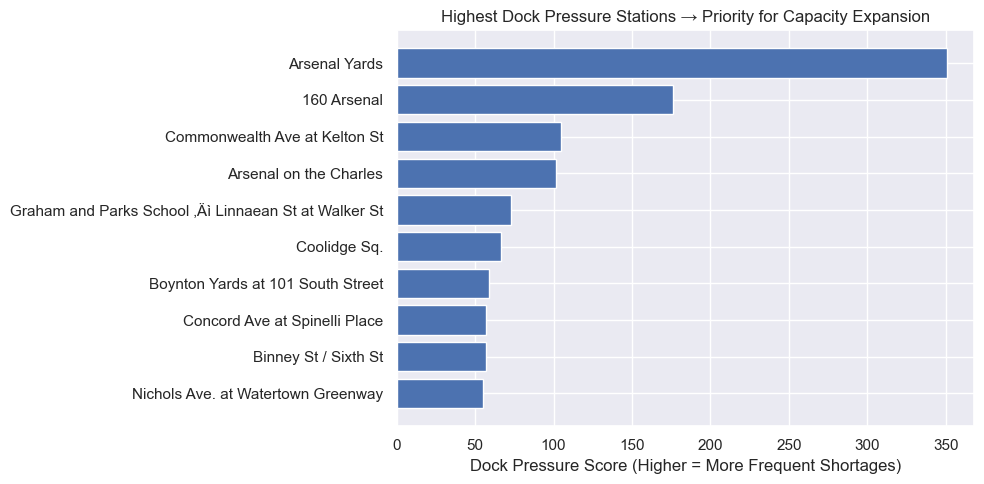

In [40]:
top10 = (
    pressure
    .sort_values("dock_pressure_score", ascending=False)
    .head(10)
)

plt.figure(figsize=(10, 5))
plt.barh(
    top10["station"],
    top10["dock_pressure_score"]
)
plt.xlabel("Dock Pressure Score (Higher = More Frequent Shortages)")
plt.title("Highest Dock Pressure Stations → Priority for Capacity Expansion")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

### Interpretation

This chart ranks stations by Dock Pressure Score, which captures how often a station
experiences bike shortages or dock saturation during peak periods.

Stations at the top of this list consistently fail to meet demand and therefore
represent the highest priority candidates for dock capacity expansion.

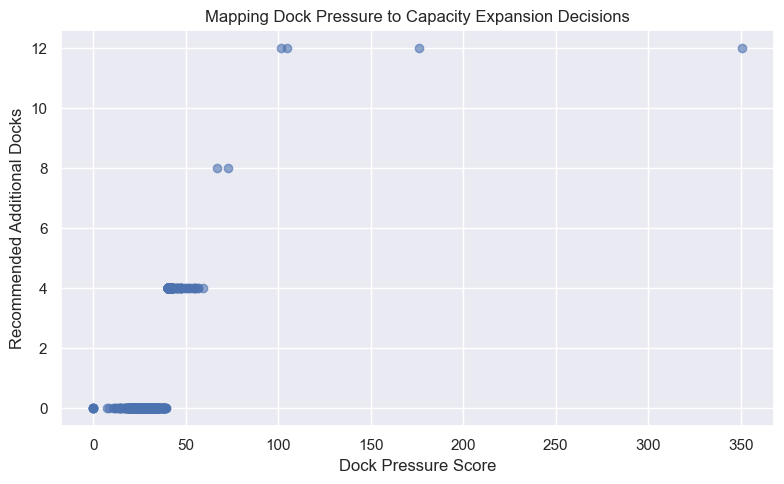

In [42]:
plt.figure(figsize=(8, 5))
plt.scatter(
    pressure["dock_pressure_score"],
    pressure["recommended_docks"],
    alpha=0.6
)
plt.xlabel("Dock Pressure Score")
plt.ylabel("Recommended Additional Docks")
plt.title("Mapping Dock Pressure to Capacity Expansion Decisions")
plt.tight_layout()
plt.show()

### Decision Logic

Dock capacity recommendations increase as dock pressure rises.
This ensures that expansion decisions are proportional to the
severity and frequency of observed shortages rather than applied uniformly.